In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.draw import disk
from skimage.measure import label, regionprops
from skimage.measure import regionprops_table
from skimage.measure import label, regionprops_table
from skimage.color import label2rgb
import matplotlib.colors as mcolors


In [9]:
def generate_varied_fluorescent_yeast_image(dimensions, num_cells, avg_diameter, var_diameter, noise_level):
    image = np.zeros((dimensions[0], dimensions[1], 3), dtype=np.float32)  # create a blank RGB image

    cell_radii = np.random.normal(loc=avg_diameter/2, scale=var_diameter/2, size=num_cells)  # radii distribution
    intensities = np.random.normal(loc=220, scale=20, size=num_cells)  # vary brightness for variety

    for _ in range(num_cells):
        x, y = np.random.randint(0, dimensions[0], size=2)  # random position for each cell
        radius = np.abs(cell_radii[_])  # ensure radius is positive
        rr, cc = disk((x, y), radius, shape=image.shape[:2])
        intensity = max(100, min(255, intensities[_]))  # clamp intensity to valid range
        image[rr, cc, 0] = intensity  # yellow channel - high intensity
        image[rr, cc, 1] = intensity * 0.8  # yellow channel - slightly lower intensity
        image[rr, cc, 2] = 0  # blue channel - no intensity

    image = gaussian_filter(image, sigma=1)  # smooth the cells a bit
    background_noise = noise_level * np.random.normal(size=image.shape[:2])
    image[:, :, 0] += background_noise  # add noise to yellow channel
    image[:, :, 1] += background_noise  # add noise to yellow channel

    return np.clip(image, 0, 255).astype(np.uint16)  # clip values to uint16 range and convert



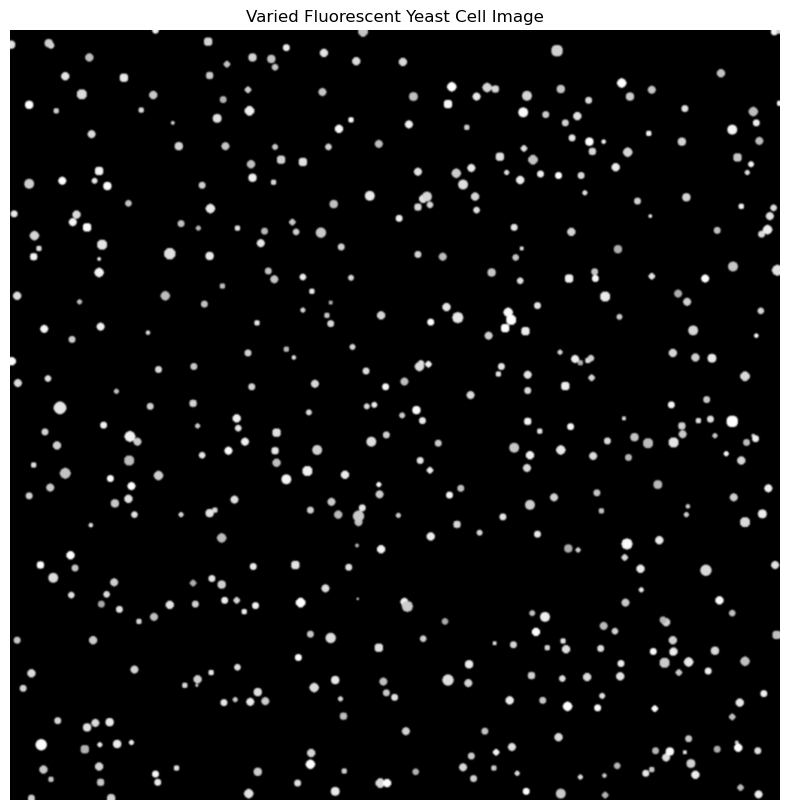

In [10]:
# properties of the intended image
dimensions = (1024, 1024)  # width and height of the image
num_cells = 500  # number of yeast cells to generate
avg_diameter = 10  # average diameter of cells in pixels
var_diameter = 2  # variance in diameter of cells in pixels
noise_level = 0.01  # background noise level

# Adds variation in cell brightness and more separation
yeast_image_varied_rgb = generate_varied_fluorescent_yeast_image(dimensions, num_cells, avg_diameter, var_diameter, noise_level)

# Convert RGB to grayscale for uint16 storage
yeast_image_varied_gray = np.mean(yeast_image_varied_rgb, axis=2).astype(np.uint16)

# Display the updated image
plt.figure(figsize=(10, 10))
plt.imshow(yeast_image_varied_gray, cmap='gray')
plt.title('Varied Fluorescent Yeast Cell Image')
plt.axis('off')
plt.show()

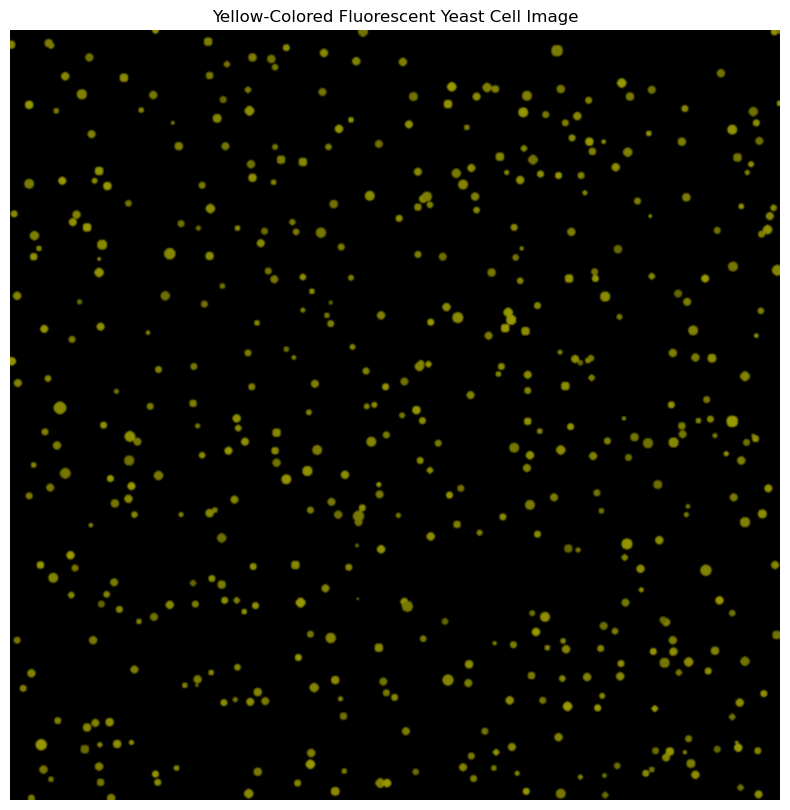

In [11]:
##Cahnge color of the image to yellow_but can be any other color too
def color_image_gray_to_yellow(grayscale_image):
    # Initialize an RGB version of the grayscale image
    yellow_image = np.zeros((grayscale_image.shape[0], grayscale_image.shape[1], 3), dtype=np.uint16)

    # Set the red and green channels to the grayscale values (yellow = red + green)
    yellow_image[:,:,0] = grayscale_image  # Red channel
    yellow_image[:,:,1] = grayscale_image  # Green channel
    yellow_image[:,:,2] = 0  # Blue channel is kept at zero

    return yellow_image

# Color the image yellow
yeast_image_yellow = color_image_gray_to_yellow(yeast_image_varied_gray)

# Display the updated image
plt.figure(figsize=(10, 10))
plt.imshow(yeast_image_yellow)
plt.title('Yellow-Colored Fluorescent Yeast Cell Image')
plt.axis('off')
plt.show()

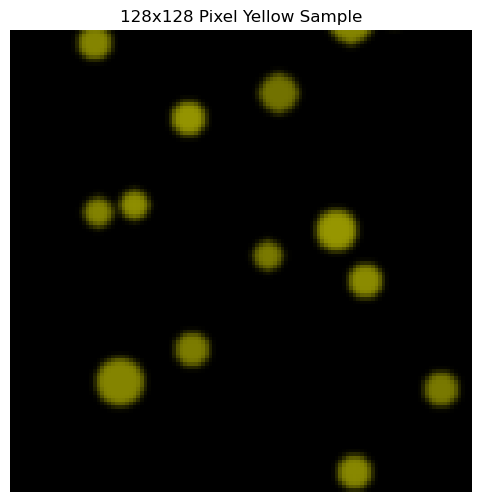

In [12]:
##sample a piece that is 128 x 128 out of the original image

yellow_sample_image = yeast_image_yellow[450:578, 450:578]

# Display the cropped sample
plt.figure(figsize=(6, 6))
plt.imshow(yellow_sample_image)
plt.title('128x128 Pixel Yellow Sample')
plt.axis('off')
plt.show()

Cell 1: Label=1, Centroid=(3.31, 23.00), Intensity=113.06
Cell 2: Label=2, Centroid=(1.19, 94.00), Intensity=104.72
Cell 3: Label=3, Centroid=(17.00, 74.00), Intensity=96.93
Cell 4: Label=4, Centroid=(24.00, 49.00), Intensity=116.68
Cell 5: Label=5, Centroid=(48.00, 34.00), Intensity=104.67
Cell 6: Label=6, Centroid=(49.98, 24.08), Intensity=102.70
Cell 7: Label=7, Centroid=(55.00, 90.00), Intensity=124.28
Cell 8: Label=8, Centroid=(62.00, 71.00), Intensity=97.16
Cell 9: Label=9, Centroid=(69.00, 98.00), Intensity=116.62
Cell 10: Label=10, Centroid=(88.00, 50.00), Intensity=103.94
Cell 11: Label=11, Centroid=(97.00, 30.00), Intensity=112.97
Cell 12: Label=12, Centroid=(99.00, 119.00), Intensity=101.52
Cell 13: Label=13, Centroid=(122.00, 95.00), Intensity=113.45


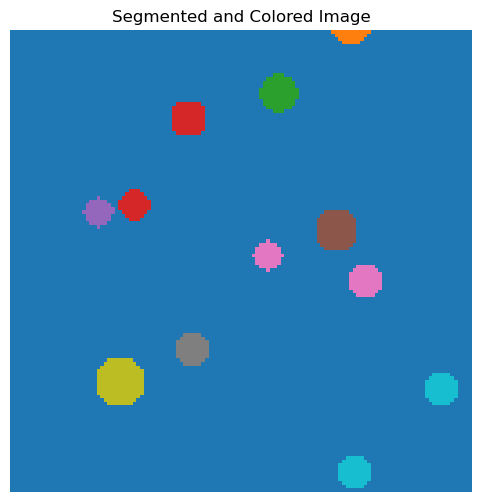

In [13]:
# Label, show coordinates and intensity for each blob

def segment_and_count(image):
    # Segment the image (simple thresholding for this example)
    labeled_image, _ = label(image[:,:,1] > 50, connectivity=1, return_num=True)
    
    # Calculate properties of labeled regions
    properties = regionprops(labeled_image, intensity_image=image[:,:,1])
    cell_info = [(prop.label, prop.centroid, prop.mean_intensity) for prop in properties]
    
    return labeled_image, cell_info

def color_labeled_image(labeled_image):
    # Map labels to colors
    colormap = mcolors.ListedColormap(mcolors.TABLEAU_COLORS)  # using a predefined set of colors
    norm = mcolors.Normalize(vmin=labeled_image.min(), vmax=labeled_image.max())
    colored_image = colormap(norm(labeled_image))
    
    return (colored_image * 255).astype(np.uint8)  # scale to uint8

# Segment the image and get cell information
labeled_sample, cell_info = segment_and_count(yellow_sample_image)

# Color the labeled image
colored_labeled_image = color_labeled_image(labeled_sample)

# Display cell info and the colored image
for index, (label, centroid, intensity) in enumerate(cell_info, 1):
    print(f"Cell {index}: Label={label}, Centroid=({centroid[0]:.2f}, {centroid[1]:.2f}), Intensity={intensity:.2f}")

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(colored_labeled_image)
plt.title('Segmented and Colored Image')
plt.axis('off')
plt.show()

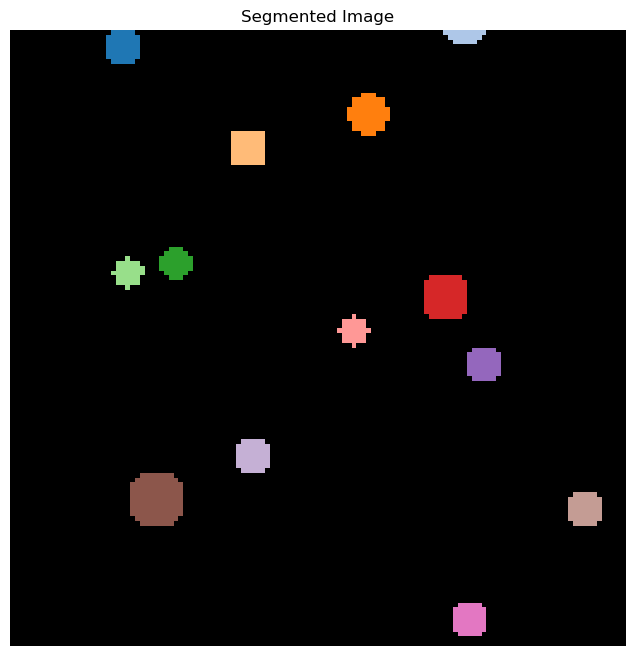

    label  centroid-0  centroid-1   area  orientation  major_axis_length  \
0       1    3.000000        23.0   45.0    -0.785398           7.542472   
1       2    0.809524        94.0   21.0    -1.570796           8.640988   
2       3   17.000000        74.0   61.0    -0.785398           8.811319   
3       4   24.000000        49.0   49.0    -0.785398           8.000000   
4       5   48.000000        34.0   37.0    -0.785398           6.833938   
5       6   49.966667        24.1   30.0    -1.249046           6.436010   
6       7   55.000000        90.0   77.0    -0.785398           9.945305   
7       8   62.000000        71.0   29.0    -0.785398           6.125132   
8       9   69.000000        98.0   45.0    -0.785398           7.542472   
9      10   88.000000        50.0   45.0    -0.785398           7.542472   
10     11   97.000000        30.0  109.0    -0.785398          11.783989   
11     12   99.000000       119.0   45.0    -0.785398           7.542472   
12     13  1

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label as sk_label, regionprops_table
from skimage.color import label2rgb
from skimage.morphology import erosion, disk
import pandas as pd
import matplotlib.colors as mcolors

def segment_and_analyze(image):
    # Convert to grayscale for segmentation
    grayscale_image = image[:, :, 1]  # Assuming we're segmenting on the green channel
    
    # Apply a binary threshold and erosion to enhance separation between blobs
    binary_image = grayscale_image > 50  # Threshold for segmentation
    eroded_image = erosion(binary_image, disk(1))  # Shrink blobs slightly

    # Label the eroded binary image
    labeled_image = sk_label(eroded_image, connectivity=1)

    # Extract properties using regionprops_table
    properties = ['label', 'centroid', 'area', 'orientation', 'major_axis_length',
                  'minor_axis_length', 'eccentricity', 'perimeter', 'mean_intensity']
    cell_info_table = regionprops_table(labeled_image, intensity_image=grayscale_image, properties=properties)
    
    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(cell_info_table)
    df['roundedness'] = 4 * np.pi * df['area'] / (df['perimeter'] ** 2)  # Calculate roundedness
    
    return labeled_image, df

def display_segmented_image(labeled_image, title='Segmented Image'):
    # Use a colormap to color the labels
    colormap = plt.get_cmap('tab20')
    colored_image = label2rgb(labeled_image, bg_label=0, bg_color=(0, 0, 0), colors=[colormap(i) for i in range(20)])
    
    plt.figure(figsize=(8, 8))
    plt.imshow(colored_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Assuming yellow_sample_image is already loaded and processed
labeled_sample, cell_properties_df = segment_and_analyze(yellow_sample_image)
display_segmented_image(labeled_sample)

# Print the cell properties DataFrame
print(cell_properties_df[['label', 'centroid-0', 'centroid-1', 'area', 'orientation', 'major_axis_length',
                          'minor_axis_length', 'eccentricity', 'perimeter', 'mean_intensity', 'roundedness']])
